In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

## Exercise

In [6]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [34]:
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='linear', C=1).fit(X, y)

In [38]:
def plot_contour(model, X, y, ax=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_title('SVC with linear kernel')


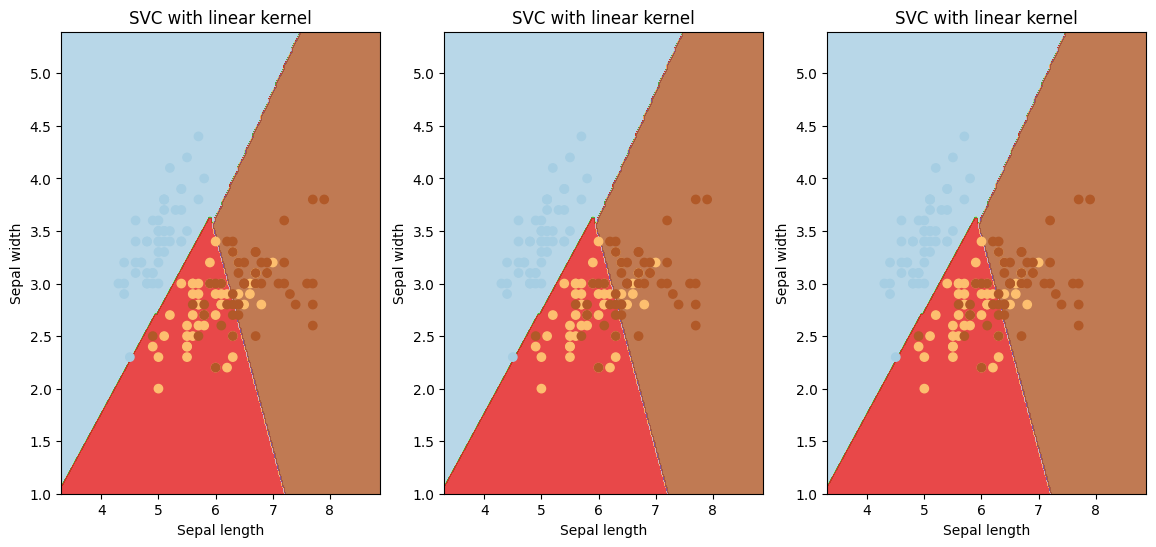

In [44]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='linear', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

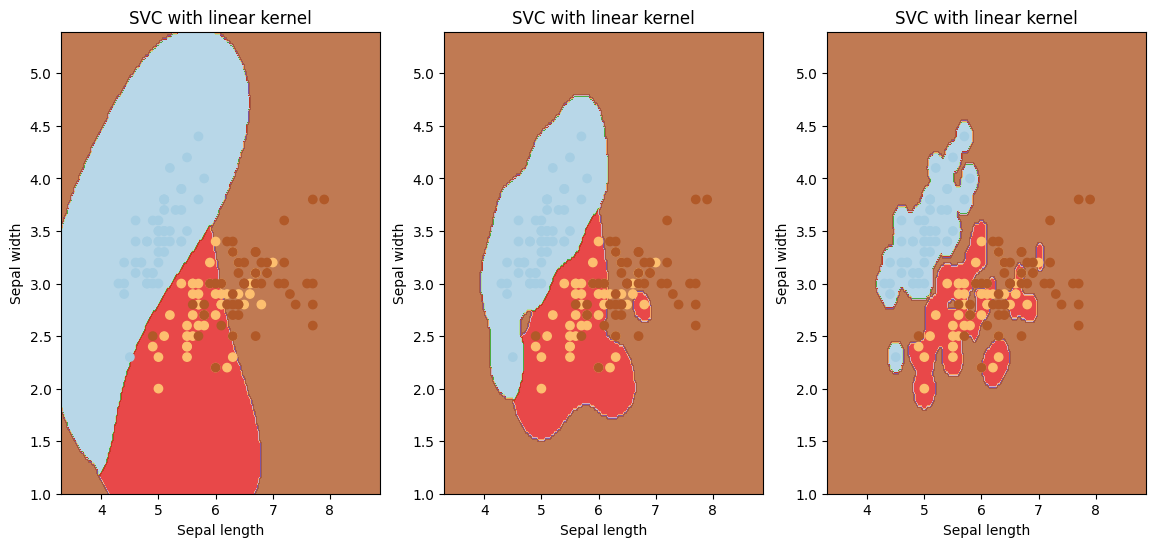

In [42]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,g in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='rbf', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

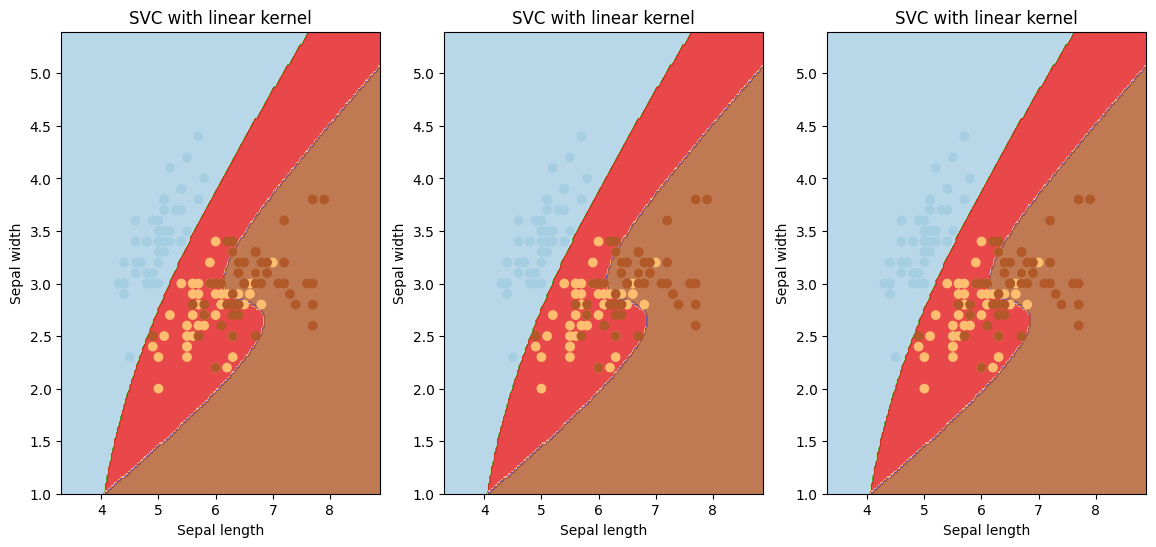

In [45]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='poly', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

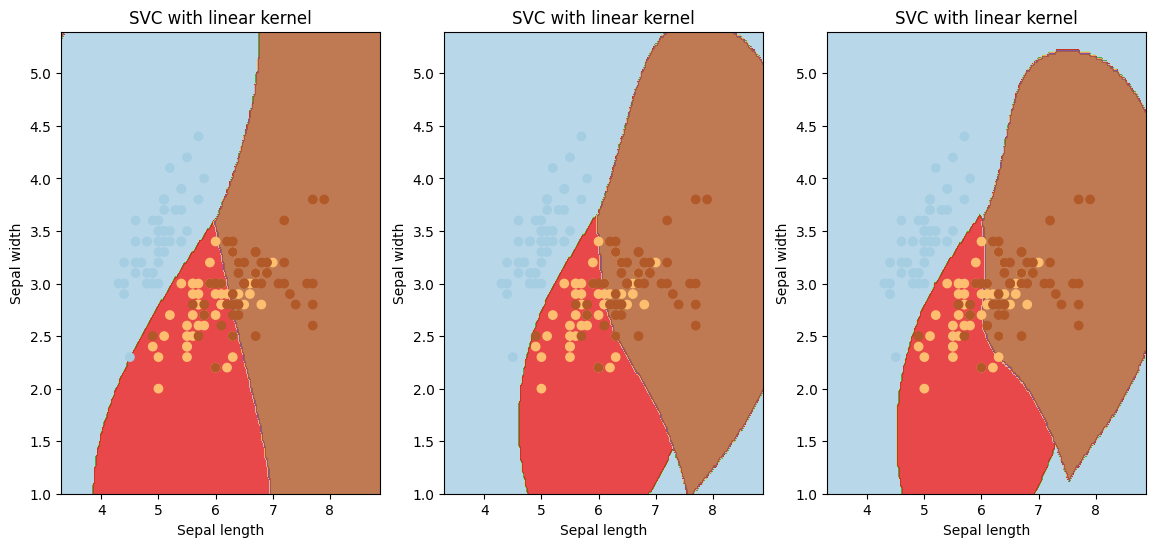

In [46]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='rbf', C=c, gamma="auto").fit(X, y), 
        X, y, ax[i]
    )

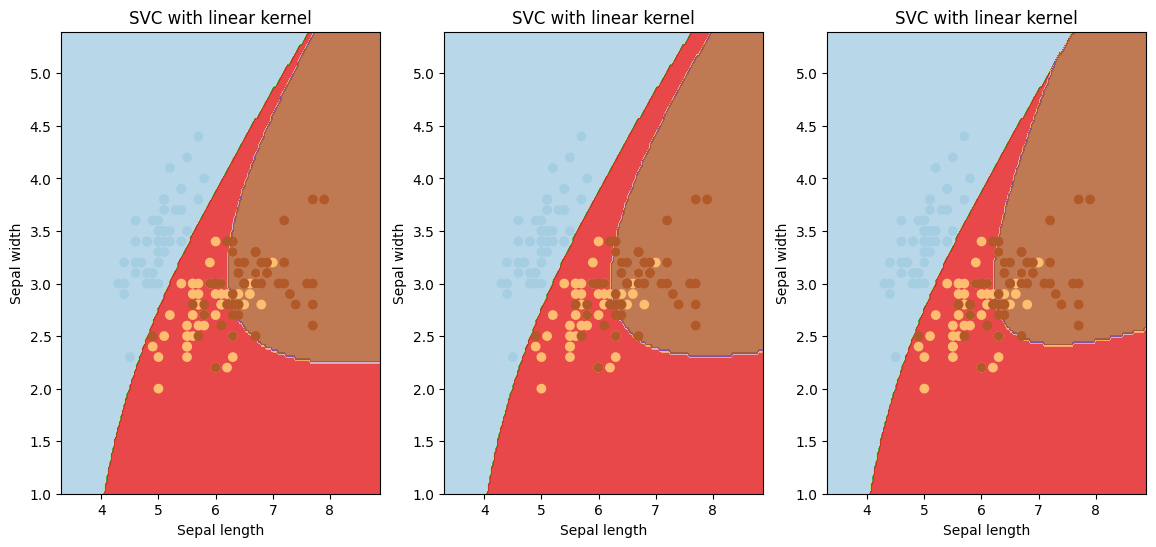

In [47]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='poly', C=c, gamma="auto").fit(X, y), 
        X, y, ax[i]
    )

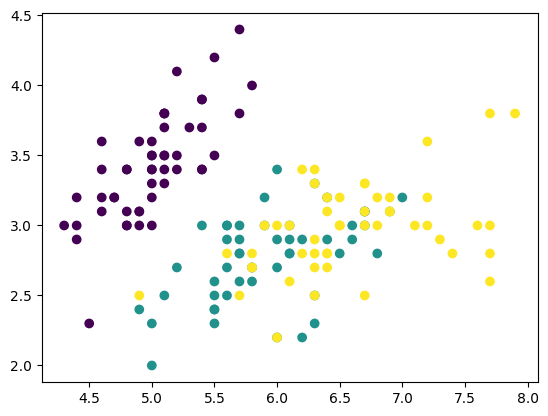

In [49]:
plt.scatter(X[:,0], X[:,1], c=y)